In [1]:
from ultralytics import YOLOSAWorld
import supervision as sv
from PIL import Image
import numpy as np
# Load a model
# model = YOLO("yolov8l-world.yaml")
# model = YOLO("yolov8l-world-sam.yaml")  # build a new model from scratch
# model.load('yolov8l-world.pt')
model = YOLOSAWorld("ckpts/yolov8l-world.pt", sam_ckpt='ckpts/yolo8lsa.pt')  # load a pretrained model (recommended for training)
# model.model.load_state_dict(model1.model.state_dict())
# del model1
# model.set_classes(['people', 'car'])
# Use the model
# model.train(data="coco128.yaml", epochs=3)  # train the model
# metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
image = np.array(Image.open('bus.jpg'))
# result = model(image, conf=0.5)[0]

In [2]:
result, detections, out_image = model.predict_yoloworld(image, ['person', 'bus'], conf=0.5)


0: 640x480 4 persons, 1 bus, 139.8ms
Speed: 6.6ms preprocess, 139.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


In [10]:
detections

Detections(xyxy=array([[     23.875,      230.68,      801.73,      756.21],
       [     669.79,      395.29,      806.15,      880.64],
       [     224.54,      407.72,      342.88,      858.17],
       [     52.564,      399.26,      241.55,      900.76],
       [     1.7742,      549.63,      63.432,      875.04]], dtype=float32), mask=None, confidence=array([    0.93978,     0.93073,     0.93063,     0.90949,     0.52917], dtype=float32), class_id=array([1, 0, 0, 0, 0]), tracker_id=None, data={})

In [5]:
from ultralytics import SAM
import torch

# Load a model
# sam = SAM('ckpts/sam/mobile_sam.pt').cuda()
sam = torch.load('weights/yolov8l_adamw_lr_1e-3_wd_5e-4_bs_8_epoch_8.pt')

In [5]:
# masks = model.sam.predictor(image)
masks = sam(image)

0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60, 1 61, 1 62, 1 63, 1 64, 1 65, 1 66, 1 67, 1 68, 1 69, 1 70, 1 71, 1 72, 1 73, 1305.8ms
Speed: 6.5ms preprocess, 1305.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


In [6]:
masks[0].masks.data.shape

torch.Size([74, 1080, 810])

In [7]:
# detections = sv.Detections.from_ultralytics(masks[0])
# detections.mask = masks[0].masks.data.cpu().numpy()

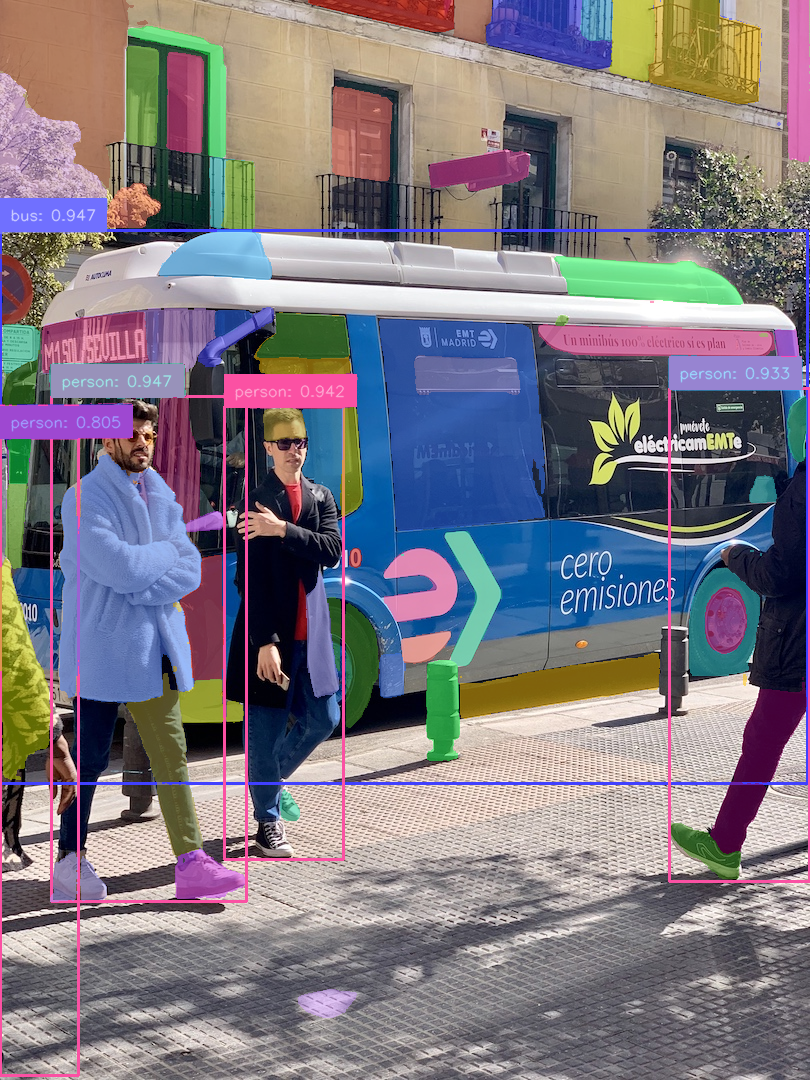

In [8]:
MASK_ANNOTATOR = sv.MaskAnnotator()
# output_image = MASK_ANNOTATOR.annotate(np.array(out_image), detections)
output_image = MASK_ANNOTATOR.annotate(image, detections)
Image.fromarray(output_image)

In [11]:
masks = []
for box in detections.xyxy:
    # masks.append(model.sam(bboxes=box))
    masks.append(sam(bboxes=box))

WARNING ⚠️ 'source' is missing. Using 'source=/data/wzj/ultralytics/ultralytics/assets'.

image 1/2 /data/wzj/ultralytics/ultralytics/assets/bus.jpg: 1024x1024 28.3ms
image 2/2 /data/wzj/ultralytics/ultralytics/assets/zidane.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 6475.1ms
Speed: 4.5ms preprocess, 3251.7ms inference, 35.5ms postprocess per image at shape (1, 3, 1024, 1024)
WARNING ⚠️ 'source' is missing. Using 'source=/data/wzj/ultralytics/ultralytics/assets'.

image 1/2 /data/wzj/ultralytics/ultralytics/assets/bus.jpg: 1024x1024 20.7ms
image 2/2 /data/wzj/ultralytics/ultralytics/assets/zidane.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1176.1ms
Speed: 4.2ms preprocess, 598.4ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)
WARNING ⚠️ 'source' is missing. Using 'source=/data/wzj/

WARNING ⚠️ 'source' is missing. Using 'source=/data/wzj/ultralytics/ultralytics/assets'.

image 1/2 /data/wzj/ultralytics/ultralytics/assets/bus.jpg: 1024x1024 50.2ms
image 2/2 /data/wzj/ultralytics/ultralytics/assets/zidane.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1109.7ms
Speed: 4.3ms preprocess, 579.9ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)


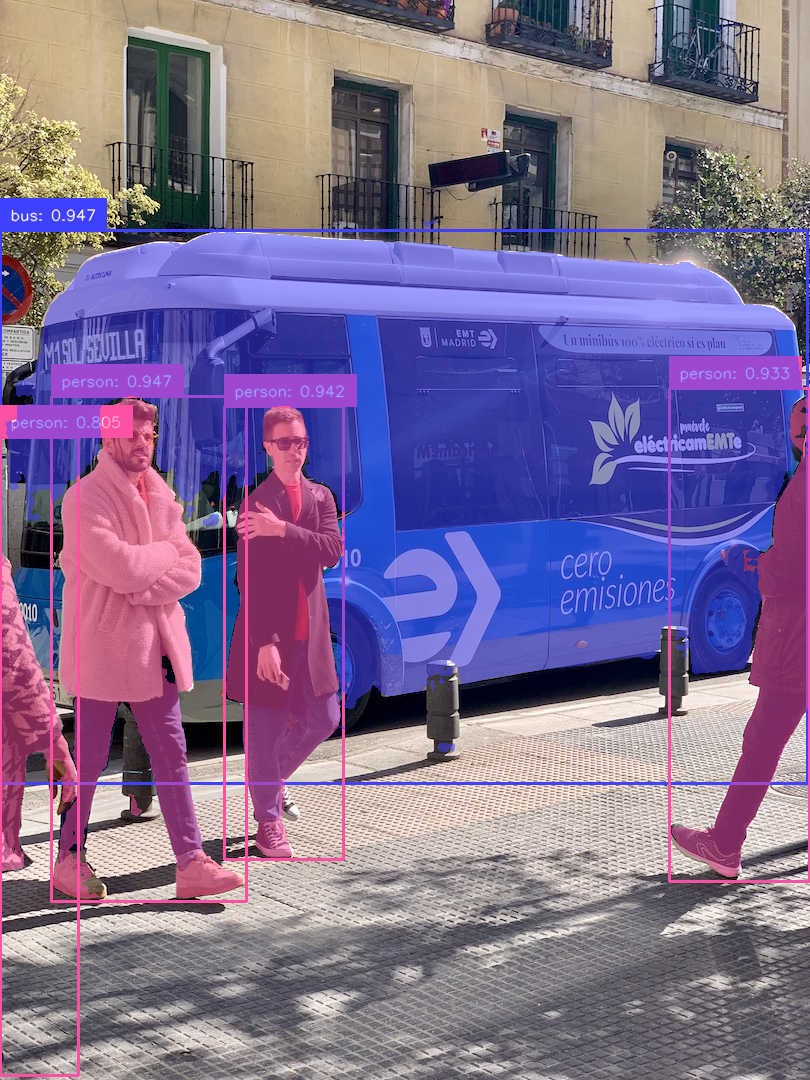

In [6]:
import torch
MASK_ANNOTATOR = sv.MaskAnnotator()
with torch.no_grad():
    masks = sam(bboxes=detections.xyxy)
detections.mask = masks[0].masks.data.cpu().numpy()
output_image = MASK_ANNOTATOR.annotate(image, detections)
Image.fromarray(output_image)

In [10]:
detections.confidence

array([    0.94635,     0.93736,     0.93696,     0.92576,     0.79762], dtype=float32)

In [2]:
from typing import List

import os
import cv2
import numpy as np
import supervision as sv
import torch
from tqdm import tqdm
# from inference.models import YOLOWorld
from ultralytics.inference_model.yolo_world import YOLOWorld
# from inference.models import YOLOWorld

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# EFFICIENT_SAM_MODEL = load(device=DEVICE)
YOLO_WORLD_MODEL = YOLOWorld(model_path="yolov8l-world.pt")

BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator()
MASK_ANNOTATOR = sv.MaskAnnotator()
LABEL_ANNOTATOR = sv.LabelAnnotator()

def process_categories(categories: str) -> List[str]:
    return [category.strip() for category in categories.split(',')]


def annotate_image(
    input_image: np.ndarray,
    detections: sv.Detections,
    categories: List[str],
    with_confidence: bool = False,
) -> np.ndarray:
    labels = [
        (
            f"{categories[class_id]}: {confidence:.3f}"
            if with_confidence
            else f"{categories[class_id]}"
        )
        for class_id, confidence in
        zip(detections.class_id, detections.confidence)
    ]
    # output_image = MASK_ANNOTATOR.annotate(input_image, detections)
    output_image = BOUNDING_BOX_ANNOTATOR.annotate(input_image, detections)
    output_image = LABEL_ANNOTATOR.annotate(output_image, detections, labels=labels)
    return output_image

def process_image(
    input_image: np.ndarray,
    model: YOLOWorld,
    categories: str,
    confidence_threshold: float = 0.3,
    iou_threshold: float = 0.5,
    with_segmentation: bool = True,
    with_confidence: bool = False,
    with_class_agnostic_nms: bool = False,
) -> np.ndarray:
    categories = process_categories(categories)
    # YOLO_WORLD_MODEL.set_classes(categories)
    yolo_model.set_classes(categories)
    # results = yolo_model(input_image)
    results = yolo_model.infer(input_image, confidence=confidence_threshold)
    detections = sv.Detections.from_inference(results)
    detections = detections.with_nms(
        class_agnostic=with_class_agnostic_nms,
        threshold=iou_threshold
    )
    # if with_segmentation:
    #     detections.mask = inference_with_boxes(
    #         image=input_image,
    #         xyxy=detections.xyxy,
    #         model=EFFICIENT_SAM_MODEL,
    #         device=DEVICE
    #     )
    output_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)
    output_image = annotate_image(
        input_image=output_image,
        detections=detections,
        categories=categories,
        with_confidence=with_confidence
    )
    return cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

In [7]:
import  cv2
image = cv2.imread('bus.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
out = process_image(image, YOLO_WORLD_MODEL, 'person,bus,window')

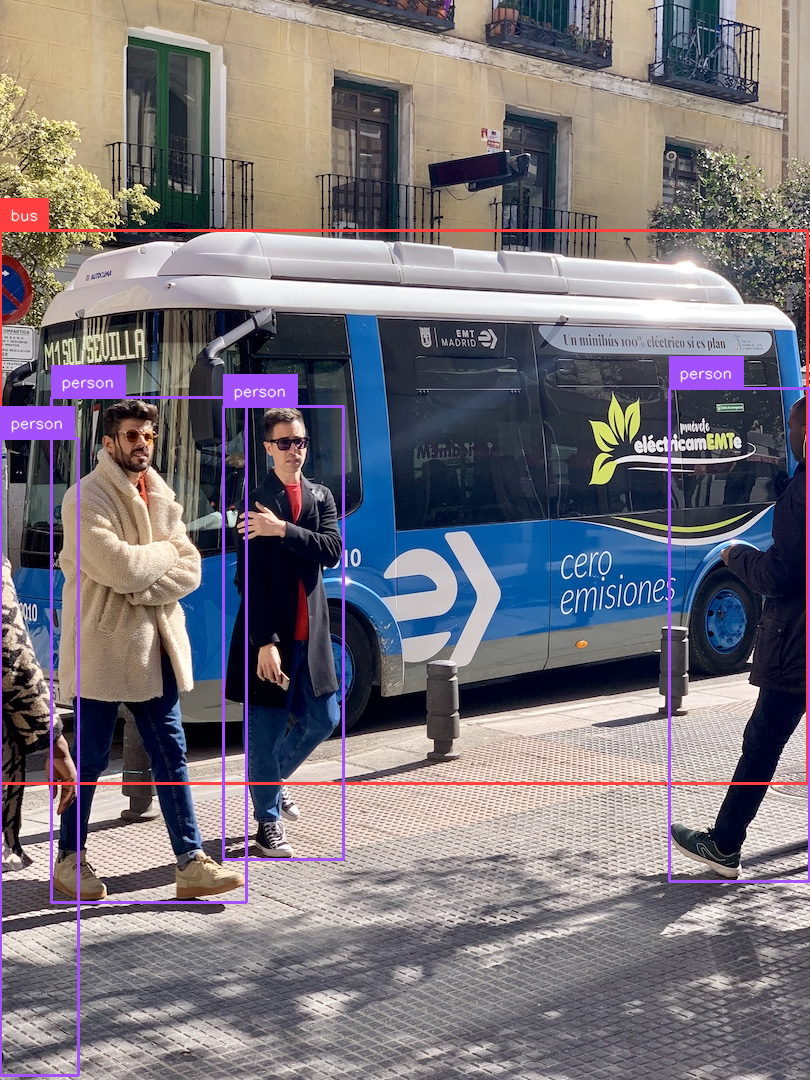

In [8]:
from PIL import Image
Image.fromarray(out)

In [6]:
model.model.image_encoder = None

In [7]:
torch.save(model, 'sam_prompt_encoder_decoder.pt')

In [3]:
import torch
model = torch.load('yolo8lsa.pt')

/root/data/anaconda3/envs/3dgs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
results = predictor(bboxes=[439, 437, 524, 709])
# results = predictor(points=[900, 370], labels=[1])


image 1/1 /data/wzj/ultralytics/ultralytics/assets/zidane.jpg: 1024x1024 4791.3ms
Speed: 243.8ms preprocess, 4791.3ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to /data/wzj/ultralytics/runs/segment/predict2


In [2]:
import os
image_names = os.listdir('data/sa/features')

In [7]:
image_names[1000]

'sa_73737.pt'

In [8]:
import numpy as np
import torch
from PIL import Image
from ultralytics.models.edge_sam.utils.transforms import ResizeLongestSide
from ultralytics.models.edge_sam.build_sam import build_sam_vit_h
sam_h = build_sam_vit_h('ckpts/sam/sam_vit_h_4b8939.pth')
sam_h_image_encoder = sam_h.image_encoder
del sam_h
image = Image.open('data/sa/images/sa_73737.jpg')
def preprocess(x, transform):
    img_size = 1024
    pixel_mean = torch.Tensor([123.675, 116.28, 103.53]).view(-1, 1, 1)
    pixel_std = torch.Tensor([58.395, 57.12, 57.375]).view(-1, 1, 1)
    """Normalize pixel values and pad to a square input."""
    x = transform.apply_image(x)
    x = torch.as_tensor(x)
    x = x.permute(2, 0, 1).contiguous()[None, :, :, :]
    # Normalize colors
    x = (x - pixel_mean) / pixel_std

    # Pad
    h, w = x.shape[-2:]
    padh = img_size - h
    padw = img_size - w
    x = torch.nn.functional.pad(x, (0, padw, 0, padh))
    return x
transform = ResizeLongestSide(1024)
trans_image_numpy = np.uint8(image)
        # image = cv2.cvtColor(cv2.imread(self.image_path_list[idx]), cv2.COLOR_BGR2RGB)
# input_image = transform.apply_image(trans_image_numpy)
# input_image_torch = torch.as_tensor(input_image)
# input_image_torch = input_image_torch.permute(2, 0, 1).contiguous()[None, :, :, :]
x = preprocess(trans_image_numpy, transform).cuda()
with torch.no_grad(): 
    feature = sam_h_image_encoder.cuda()(x)
# out = adapter(x)

In [10]:
import torch
feature_1 = torch.load('data/sa/features/sa_73737.pt')

In [11]:
feature == feature_1.cuda()

tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ...